In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from termcolor import colored
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import seaborn as sb
from sklearn.metrics import roc_auc_score

In [2]:
data = pd.read_csv("Leukemia.csv")
data['type'].unique()

array(['Bone_Marrow_CD34', 'Bone_Marrow', 'AML', 'PB', 'PBSC_CD34'],
      dtype=object)

In [3]:
y = data['type']
x = data.drop('type', axis = 'columns')

In [4]:
x

,samples,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,1,7.745245,7.811210,6.477916,8.841506,4.546941,7.957714,5.344999,4.673364,4.664924,...,5.058849,6.810004,12.800060,12.718612,5.391512,4.666166,3.974759,3.656693,4.160622,4.139249
1,12,8.087252,7.240673,8.584648,8.983571,4.548934,8.011652,5.579647,4.828184,5.171835,...,4.436153,6.751471,12.472706,12.333593,5.379738,4.656786,4.188348,3.792535,4.204414,4.122700
2,13,7.792056,7.549368,11.053504,8.909703,4.549328,8.237099,5.406489,4.615572,4.775709,...,4.392061,6.086295,12.637384,12.499038,5.316604,4.600566,3.845561,3.635715,4.174199,4.067152
3,14,7.767265,7.094460,11.816433,8.994654,4.697018,8.283412,5.582195,4.903684,4.829844,...,4.633334,6.375991,12.903630,12.871454,5.179951,4.641952,3.991634,3.704587,4.149938,3.910150
4,15,8.010117,7.405281,6.656049,9.050682,4.514986,8.377046,5.493713,4.860754,5.245049,...,5.305192,6.700453,12.949352,12.782515,5.341689,4.560315,3.887020,3.629853,4.127513,4.004316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,60,7.686106,6.856961,6.822222,8.849700,4.440703,8.456949,5.408897,4.708615,4.691377,...,4.969400,7.016576,12.997293,12.828832,5.084120,4.531087,3.884230,3.619301,4.108490,4.070028
60,61,7.816168,6.875124,6.532324,8.827857,4.515457,8.450286,5.482797,4.667874,4.968642,...,4.826255,6.577223,12.990305,12.855352,5.260451,4.568651,3.927693,3.634879,4.112277,4.064780
61,62,7.863092,6.896242,6.630690,8.775139,4.458048,8.664517,5.577298,4.853996,4.815901,...,5.065816,6.583261,12.786121,12.588852,5.451940,4.739944,4.010427,3.668713,4.162220,4.102264
62,63,7.900992,6.787515,6.642927,8.856187,4.499548,9.188459,5.471110,4.637444,5.036441,...,4.985061,6.815527,13.020089,12.824868,5.459571,4.602105,4.019624,3.570563,4.141371,4.102641


Dropujemo ciljnu kolonu.

In [5]:
y.replace("AML", 0, inplace = True)
y.replace("Bone_Marrow", 1, inplace = True)
y.replace("Bone_Marrow_CD34", 2, inplace = True)
y.replace("PB", 3, inplace = True)
y.replace("PBSC_CD34", 4, inplace = True)
y.unique()

array([2, 1, 0, 3, 4])

- 0 -> AML
- 1 -> Bone_Marrow
- 2 -> Bone_Marrow_CD34
- 3 -> PB
- 4 -> PBSC_CD34

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

Podatke i njihove labele (tipove) smo podelili na train i test skupove

In [7]:
x_train

,samples,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
13,7,7.720314,6.583612,6.756619,8.845196,4.477831,8.064107,5.539644,4.537853,7.226976,...,5.191044,6.824745,13.123380,13.057701,5.230581,4.416719,3.890692,3.551122,4.097900,3.976198
34,35,7.565505,6.387039,6.943786,8.961879,4.512782,9.072825,5.394358,4.903786,6.723830,...,5.067037,6.235703,13.246262,13.111557,5.297888,4.600495,3.885986,3.677620,4.083713,4.056108
50,51,7.679455,6.535146,8.598109,8.591818,4.380294,8.183958,5.473819,4.501277,8.649079,...,4.494980,6.460861,13.066311,13.021041,5.194655,4.573630,3.946708,3.614328,4.101009,4.029428
3,14,7.767265,7.094460,11.816433,8.994654,4.697018,8.283412,5.582195,4.903684,4.829844,...,4.633334,6.375991,12.903630,12.871454,5.179951,4.641952,3.991634,3.704587,4.149938,3.910150
17,11,7.813454,6.794223,6.576484,8.904530,4.506871,7.893402,5.532314,4.558692,8.601630,...,4.620766,6.573429,12.562943,12.435309,5.339725,4.535060,3.864028,3.576569,4.081583,3.985984
49,50,8.021694,6.286823,8.952662,8.862089,4.585165,8.280266,5.777682,4.652564,8.708122,...,4.622493,6.267578,13.193406,12.789475,5.220769,4.535342,3.929496,3.691120,4.200518,4.158051
8,2,7.966060,6.781246,6.920990,8.978862,4.478028,7.683032,5.610469,4.824193,7.502364,...,4.742075,6.794769,13.524380,13.400021,5.327728,4.631000,3.897626,3.671963,4.002604,4.058350
6,17,8.167701,6.949900,7.604404,9.326422,4.754915,7.331400,5.908871,5.193624,4.962044,...,4.650690,6.836679,13.239335,13.024450,5.635133,4.831326,4.118359,3.676294,4.290143,4.232628
33,34,7.760597,6.511641,6.798202,9.061344,4.467035,8.097595,5.758213,4.901653,5.649901,...,4.958284,6.685865,13.369934,13.183340,5.255310,4.630424,3.857206,3.612103,4.133333,4.214118
4,15,8.010117,7.405281,6.656049,9.050682,4.514986,8.377046,5.493713,4.860754,5.245049,...,5.305192,6.700453,12.949352,12.782515,5.341689,4.560315,3.887020,3.629853,4.127513,4.004316


# Sada mozemo napraviti prvu verziju naseg stabla odlucivanja

In [11]:
tree1 = DecisionTreeClassifier()
model = tree1.fit(x_train, y_train)

In [8]:
def report(model, x, y, text = 'training'):
    y_pred = model.predict(x)
    
    print(colored("Classification report for model {} on {} data".format(type(model).__name__, text), "green"))
    print("---------------------------------------------------------------------------------")
    print(classification_report(y, y_pred))
    print("---------------------------------------------------------------------------------")
    
    print(colored("Confusion matrix for model {} on {} data ".format(type(model).__name__, text), "green"))
    print("---------------------------------------------------------------------------------")
    print(pd.DataFrame(confusion_matrix(y, y_pred), columns=[0, 1, 2, 3, 4], index=[0, 1, 2, 3, 4]))
    print("---------------------------------------------------------------------------------")

def plot_decision_tree(model, names):
    plt.figure(figsize= (7, 7))
    plot_tree(model, class_names=['0', '1', '2', '3', '4'], feature_names=names, filled=True)
    plt.title("Decision tree of depth {} with {} nodes".format(model.get_depth(), model.get_n_leaves()))

    plt.show()
    print("---------------------------------------------------------------------------------")
    print(colored("Parameters of model {}".format(type(model).__name__), "green"))
    for k, v in model.get_params().items():
        print(colored(k, 'blue'), v)
    
    print("---------------------------------------------------------------------------------")

<Figure size 640x480 with 0 Axes>

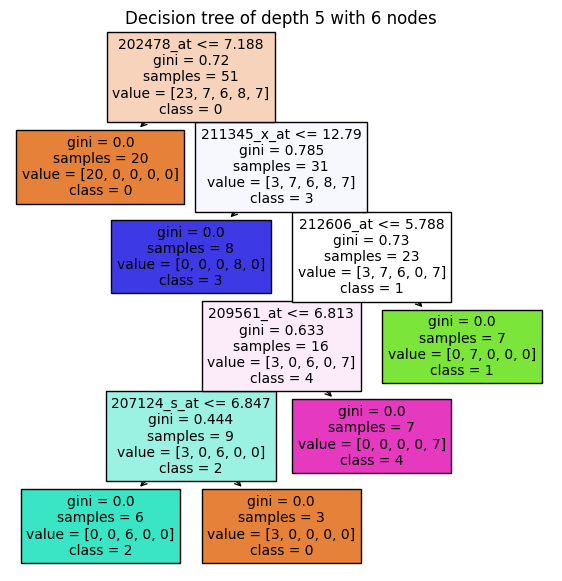

---------------------------------------------------------------------------------
Parameters of model DecisionTreeClassifier
ccp_alpha 0.0
class_weight None
criterion gini
max_depth None
max_features None
max_leaf_nodes None
min_impurity_decrease 0.0
min_samples_leaf 1
min_samples_split 2
min_weight_fraction_leaf 0.0
random_state None
splitter best
---------------------------------------------------------------------------------


In [13]:
plt.figure()
plot_decision_tree(tree1, list(x.columns))
plt.show()

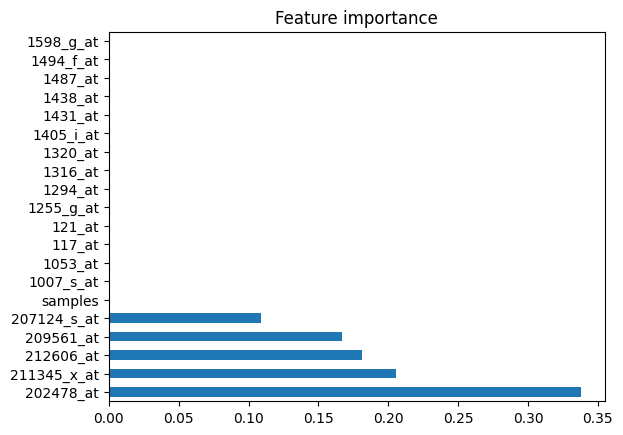

In [14]:
feat_importances = pd.Series(tree1.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind = 'barh')
plt.title("Feature importance")
plt.show()

Naravno, nas model i koristi samo ovih 5 atributa kako bi doneo odluku, tako da samo i njima daje ikakav znacaj.

In [15]:
report(tree1, x_train, y_train)

Classification report for model DecisionTreeClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         7

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51

---------------------------------------------------------------------------------
Confusion matrix for model DecisionTreeClassifier on training data 
---------------------------------------------------------------------------------
    0  1  2  3  4
0  23  0  0  0  0
1   0  7  0  0  0
2   0  0  6  0  0
3   0  0  0  8  0
4   0  0  0  0  7
-----------------

In [16]:
report(tree1, x_test, y_test)

Classification report for model DecisionTreeClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       1.00      0.67      0.80         3
           2       1.00      1.00      1.00         2
           3       0.67      1.00      0.80         2
           4       0.67      0.67      0.67         3

    accuracy                           0.77        13
   macro avg       0.80      0.80      0.79        13
weighted avg       0.79      0.77      0.77        13

---------------------------------------------------------------------------------
Confusion matrix for model DecisionTreeClassifier on training data 
---------------------------------------------------------------------------------
   0  1  2  3  4
0  2  0  0  0  1
1  0  2  0  1  0
2  0  0  2  0  0
3  0  0  0  2  0
4  1  0  0  0  2
-----------------------

Ovako naivan model ima preciznost skoro 70%, ali to mozda mozemo popraviti detaljnijim podesavanjem hiper-parametara

In [69]:
def matConf(model, x, y):
    y_pred = model.predict(x)
    return confusion_matrix(y, y_pred)

akws = {'c': 'red'}

<Axes: >

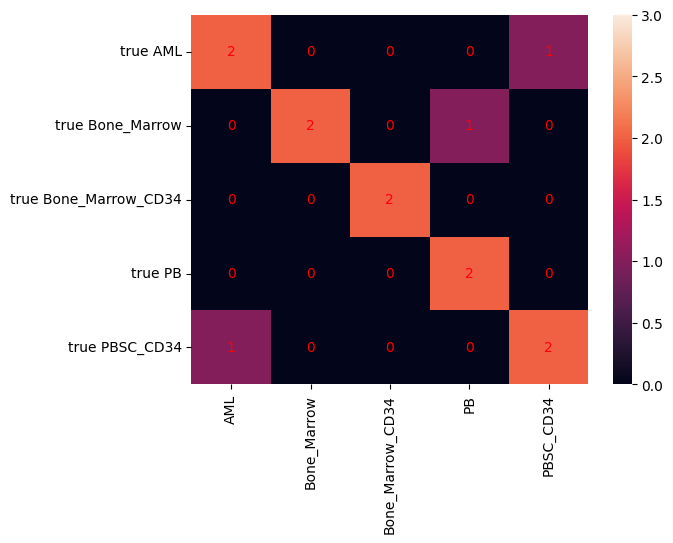

In [18]:
sb.heatmap(matConf(tree1, x_test, y_test), xticklabels = ["AML", "Bone_Marrow", "Bone_Marrow_CD34", "PB", "PBSC_CD34"], yticklabels = ["true AML", "true Bone_Marrow", "true Bone_Marrow_CD34", "true PB", "true PBSC_CD34"], annot = True, annot_kws = akws, fmt = 'g', vmin = 0, vmax = 3)

In [19]:
params = {'criterion': ['gini', 'entropy'],
          'max_depth': [2, 4, 6, 8]
         }

In [20]:
estimator = GridSearchCV(DecisionTreeClassifier(), params, n_jobs = 32)

In [21]:
estimator.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=32,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8]})

In [22]:
estimator.best_params_

{'criterion': 'entropy', 'max_depth': 4}

In [23]:
estimator.best_score_

0.8254545454545454

In [24]:
report(estimator.best_estimator_, x_train, y_train)

Classification report for model DecisionTreeClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         7

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51

---------------------------------------------------------------------------------
Confusion matrix for model DecisionTreeClassifier on training data 
---------------------------------------------------------------------------------
    0  1  2  3  4
0  23  0  0  0  0
1   0  7  0  0  0
2   0  0  6  0  0
3   0  0  0  8  0
4   0  0  0  0  7
-----------------

In [25]:
report(estimator.best_estimator_, x_test, y_test, "test")

Classification report for model DecisionTreeClassifier on test data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       1.00      1.00      1.00         3
           2       0.50      0.50      0.50         2
           3       1.00      1.00      1.00         2
           4       0.75      1.00      0.86         3

    accuracy                           0.85        13
   macro avg       0.85      0.83      0.83        13
weighted avg       0.87      0.85      0.84        13

---------------------------------------------------------------------------------
Confusion matrix for model DecisionTreeClassifier on test data 
---------------------------------------------------------------------------------
   0  1  2  3  4
0  2  0  1  0  0
1  0  3  0  0  0
2  0  0  1  0  1
3  0  0  0  2  0
4  0  0  0  0  3
-------------------------------

In [26]:
tree2 = estimator.best_estimator_

<Figure size 640x480 with 0 Axes>

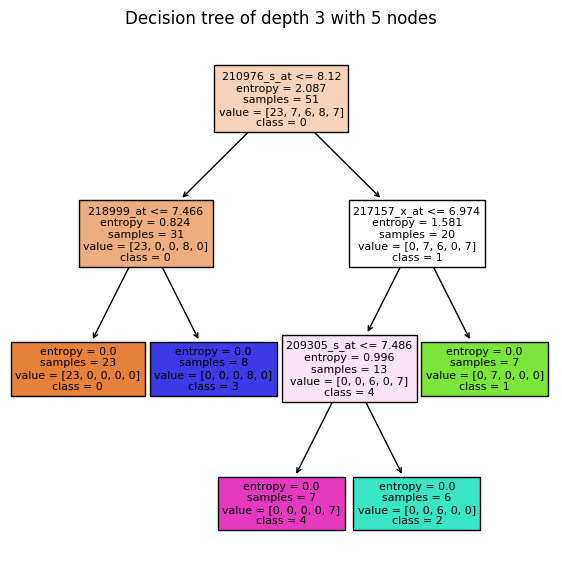

---------------------------------------------------------------------------------
Parameters of model DecisionTreeClassifier
ccp_alpha 0.0
class_weight None
criterion entropy
max_depth 4
max_features None
max_leaf_nodes None
min_impurity_decrease 0.0
min_samples_leaf 1
min_samples_split 2
min_weight_fraction_leaf 0.0
random_state None
splitter best
---------------------------------------------------------------------------------


In [27]:
plt.figure()
plot_decision_tree(tree2, list(x.columns))
plt.show()

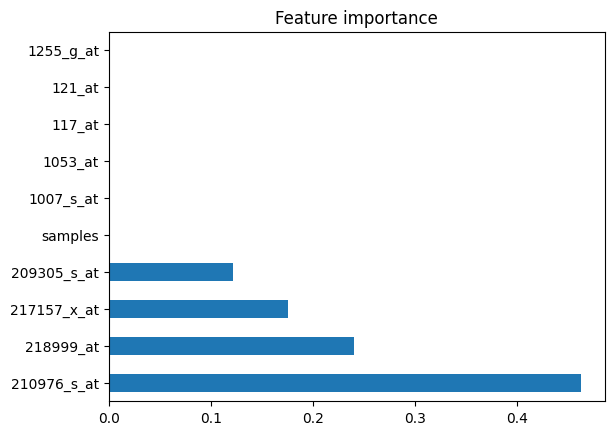

In [28]:
feat_importances = pd.Series(tree2.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind = 'barh')
plt.title("Feature importance")
plt.show()

Model pridaje znacaj samo ovim atributima, a najveci znacaj daje 210976_s_at.

<Axes: >

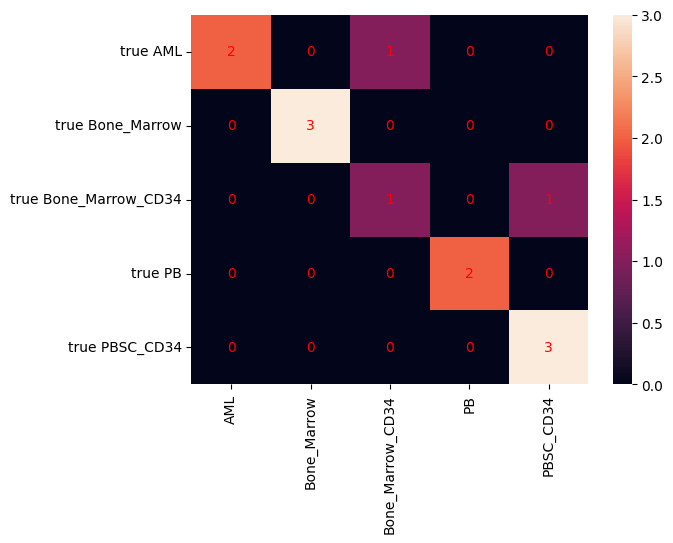

In [31]:
sb.heatmap(matConf(tree2, x_test, y_test), xticklabels = ["AML", "Bone_Marrow", "Bone_Marrow_CD34", "PB", "PBSC_CD34"], yticklabels = ["true AML", "true Bone_Marrow", "true Bone_Marrow_CD34", "true PB", "true PBSC_CD34"], annot = True, annot_kws = akws, fmt = 'g', vmin = 0, vmax = 3)

## Sta bi se desilo kada bi prvom modelu izbacili svih 5 atributa kojima je dao znacaj?

In [32]:
x_train2 = x_train.drop('207124_s_at', axis = 'columns')
x_train2 = x_train.drop('209561_at', axis = 'columns')
x_train2 = x_train.drop('212606_at', axis = 'columns')
x_train2 = x_train.drop('211345_x_at', axis = 'columns')
x_train2 = x_train.drop('202478_at', axis = 'columns')
x_test2 = x_test.drop('207124_s_at', axis = 'columns')
x_test2 = x_test.drop('209561_at', axis = 'columns')
x_test2 = x_test.drop('212606_at', axis = 'columns')
x_test2 = x_test.drop('211345_x_at', axis = 'columns')
x_test2 = x_test.drop('202478_at', axis = 'columns')

In [37]:
tree3 = DecisionTreeClassifier()
model = tree3.fit(x_train2, y_train)

<Figure size 640x480 with 0 Axes>

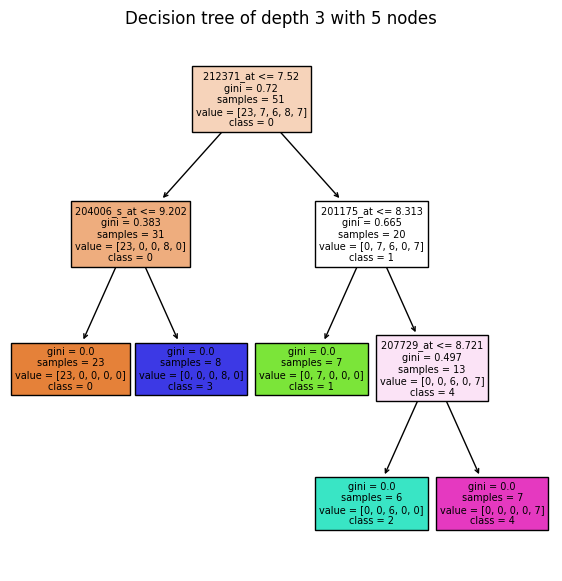

---------------------------------------------------------------------------------
Parameters of model DecisionTreeClassifier
ccp_alpha 0.0
class_weight None
criterion gini
max_depth None
max_features None
max_leaf_nodes None
min_impurity_decrease 0.0
min_samples_leaf 1
min_samples_split 2
min_weight_fraction_leaf 0.0
random_state None
splitter best
---------------------------------------------------------------------------------


In [38]:
plt.figure()
plot_decision_tree(tree3, list(x.columns))
plt.show()

In [39]:
report(tree3, x_train2, y_train)

Classification report for model DecisionTreeClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         7

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51

---------------------------------------------------------------------------------
Confusion matrix for model DecisionTreeClassifier on training data 
---------------------------------------------------------------------------------
    0  1  2  3  4
0  23  0  0  0  0
1   0  7  0  0  0
2   0  0  6  0  0
3   0  0  0  8  0
4   0  0  0  0  7
-----------------

In [40]:
report(tree3, x_test2, y_test)

Classification report for model DecisionTreeClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.50      0.33      0.40         3
           2       0.50      1.00      0.67         2
           3       1.00      1.00      1.00         2
           4       0.50      0.33      0.40         3

    accuracy                           0.69        13
   macro avg       0.70      0.73      0.69        13
weighted avg       0.69      0.69      0.67        13

---------------------------------------------------------------------------------
Confusion matrix for model DecisionTreeClassifier on training data 
---------------------------------------------------------------------------------
   0  1  2  3  4
0  3  0  0  0  0
1  0  1  1  0  1
2  0  0  2  0  0
3  0  0  0  2  0
4  0  1  1  0  1
-----------------------

Vratili smo se na preciznost 70%

<Axes: >

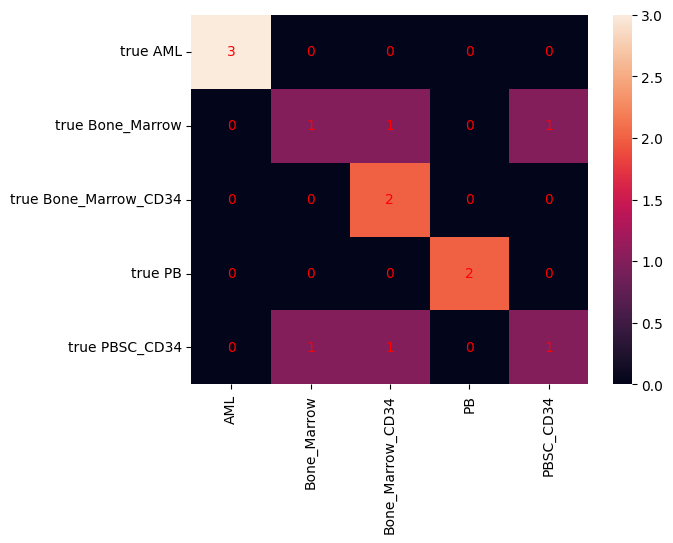

In [41]:
sb.heatmap(matConf(tree3, x_test2, y_test), xticklabels = ["AML", "Bone_Marrow", "Bone_Marrow_CD34", "PB", "PBSC_CD34"], yticklabels = ["true AML", "true Bone_Marrow", "true Bone_Marrow_CD34", "true PB", "true PBSC_CD34"], annot = True, annot_kws = akws, fmt = 'g', vmin = 0, vmax = 3)

Svaki put kada pokrecem algoritme iznad, oni prave drugacija stabla odlucivanja. </br>
Posto je max_features po defaultu jednak None (tj. max_features = n_features), znamo da algoritam razmatra split po svim atributima. Jedini razlog moze biti to da vise atributa ima jednako kvalitetan split, pa se pri svakom pokretanju nasumicno bira jedan. To, naravno, utice na preciznost naseg modela. </br>
Ovo se moze izbeci tako sto ce se postaviti seed, tj. random_state na neki broj. Tada, pri svakom pokretanju algoritma, ne bi nasumican najbolji split bio izabran, vec unapred predodredjen. Petljom bi mogli da ispisemo preciznosti svih mogucih drveta, pa da izaberemo ono sa najboljom preciznoscu.

In [14]:
for n in range(0,100):
    tree_n = DecisionTreeClassifier(random_state = n)
    tree_n.fit(x_train, y_train)
    y_pred = tree_n.predict(x_test)
    print("Tacnost je: ", accuracy_score(y_test, y_pred), "za random_state: ", n)

Tacnost je:  0.8461538461538461 za random_state:  0
Tacnost je:  0.6153846153846154 za random_state:  1
Tacnost je:  0.8461538461538461 za random_state:  2
Tacnost je:  0.8461538461538461 za random_state:  3
Tacnost je:  0.8461538461538461 za random_state:  4
Tacnost je:  0.5384615384615384 za random_state:  5
Tacnost je:  0.7692307692307693 za random_state:  6
Tacnost je:  0.6923076923076923 za random_state:  7
Tacnost je:  0.8461538461538461 za random_state:  8
Tacnost je:  0.6923076923076923 za random_state:  9
Tacnost je:  0.7692307692307693 za random_state:  10
Tacnost je:  0.9230769230769231 za random_state:  11
Tacnost je:  0.7692307692307693 za random_state:  12
Tacnost je:  0.7692307692307693 za random_state:  13
Tacnost je:  0.7692307692307693 za random_state:  14
Tacnost je:  0.7692307692307693 za random_state:  15
Tacnost je:  0.7692307692307693 za random_state:  16
Tacnost je:  0.8461538461538461 za random_state:  17
Tacnost je:  0.7692307692307693 za random_state:  18
Tac

Dobijamo skoro 85% tacnost za dosta random stejtova, uzmimo random_state = 2

<Figure size 640x480 with 0 Axes>

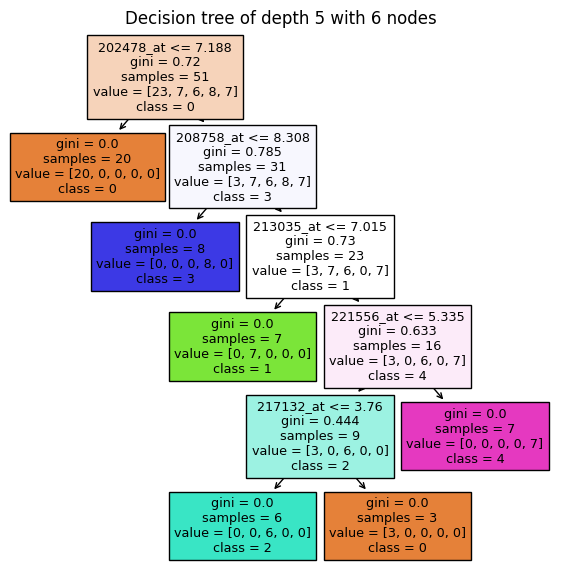

---------------------------------------------------------------------------------
Parameters of model DecisionTreeClassifier
ccp_alpha 0.0
class_weight None
criterion gini
max_depth None
max_features None
max_leaf_nodes None
min_impurity_decrease 0.0
min_samples_leaf 1
min_samples_split 2
min_weight_fraction_leaf 0.0
random_state 2
splitter best
---------------------------------------------------------------------------------


In [9]:
tree_n_2 = DecisionTreeClassifier(random_state = 2)
tree_n_2.fit(x_train, y_train)
plt.figure()
plot_decision_tree(tree_n_2, list(x.columns))
plt.show()

In [10]:
report(tree_n_2, x_train, y_train, "train")
report(tree_n_2, x_test, y_test, "test")

Classification report for model DecisionTreeClassifier on train data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         7

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51

---------------------------------------------------------------------------------
Confusion matrix for model DecisionTreeClassifier on train data 
---------------------------------------------------------------------------------
    0  1  2  3  4
0  23  0  0  0  0
1   0  7  0  0  0
2   0  0  6  0  0
3   0  0  0  8  0
4   0  0  0  0  7
-----------------------

Tacnost 85% i stablo ce ostati isti prilikom svakog pokretanja.

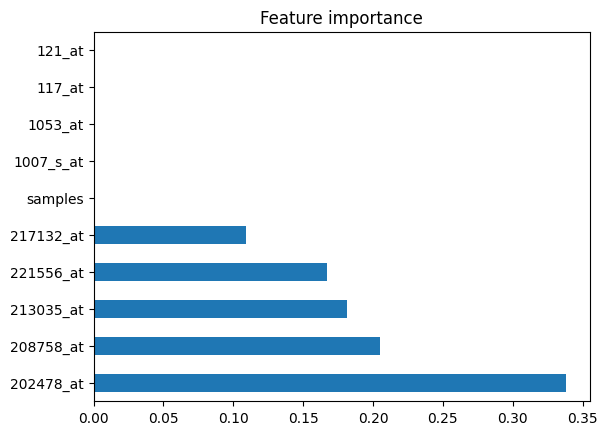

In [11]:
feat_importances = pd.Series(tree_n_2.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind = 'barh')
plt.title("Feature importance")
plt.show()

Sada mozemo da odradimo box plot ovih "najbitnijih" ekspresija.

In [12]:
BMCD34 = data[data['type'] == 2]
BM     = data[data['type'] == 1]
AML    = data[data['type'] == 0]
PB     = data[data['type'] == 3]
PBSC   = data[data['type'] == 4]

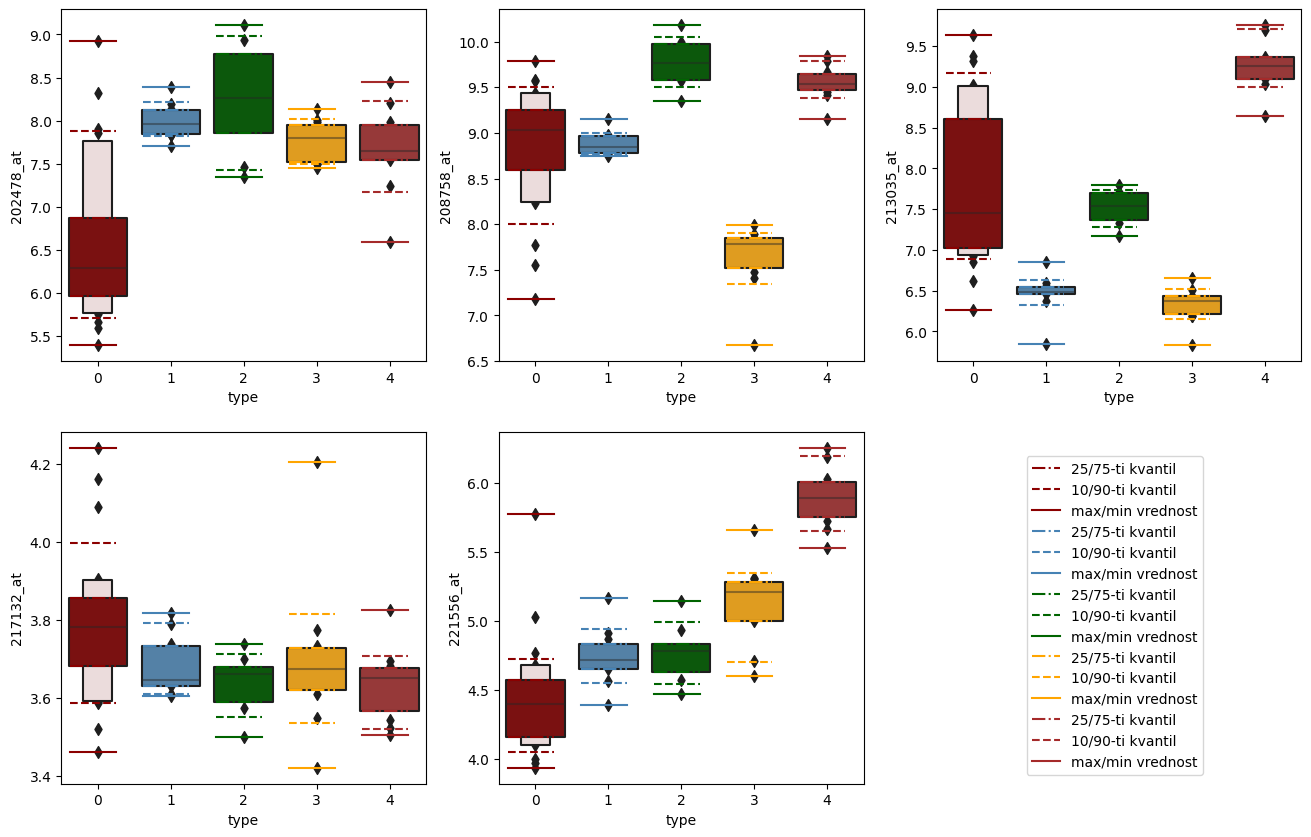

In [13]:
i = 1
plt.figure(figsize = (16, 32))
for key in data.keys():
  if key in {"202478_at", "208758_at", "213035_at", "221556_at", "217132_at"}:
    if i == 6:
        break
        
    plt.subplot(6, 3, i)
   
    sb.boxenplot(x = data['type'], y = data[key], palette = ['DarkRed', 'SteelBlue','DarkGreen', 'Orange', 'Brown'], k_depth = 'trustworthy')
    
    plt.axhline(AML[key].quantile(q = 0.75), xmin = 0.025, xmax = 0.15, color = 'DarkRed', linestyle = '-.', label = '25/75-ti kvantil')
    plt.axhline(AML[key].quantile(q = 0.25), xmin = 0.025, xmax = 0.15, color = 'DarkRed', linestyle = '-.')
    plt.axhline(AML[key].quantile(q = 0.90), xmin = 0.025, xmax = 0.15, color = 'DarkRed', linestyle = '--', label = '10/90-ti kvantil')
    plt.axhline(AML[key].quantile(q = 0.10), xmin = 0.025, xmax = 0.15, color = 'DarkRed', linestyle = '--')
    plt.axhline(AML[key].max(), xmin = 0.025, xmax = 0.15, color = 'DarkRed', label = 'max/min vrednost')
    plt.axhline(AML[key].min(), xmin = 0.025, xmax = 0.15, color = 'DarkRed')
    
    plt.axhline(BM[key].quantile(q = 0.75), xmin = 0.225, xmax = 0.35, color = 'SteelBlue', linestyle = '-.', label = '25/75-ti kvantil')
    plt.axhline(BM[key].quantile(q = 0.25), xmin = 0.225, xmax = 0.35, color = 'SteelBlue', linestyle = '-.')
    plt.axhline(BM[key].quantile(q = 0.90), xmin = 0.225, xmax = 0.35, color = 'SteelBlue', linestyle = '--', label = '10/90-ti kvantil')
    plt.axhline(BM[key].quantile(q = 0.10), xmin = 0.225, xmax = 0.35, color = 'SteelBlue', linestyle = '--')
    plt.axhline(BM[key].max(), xmin = 0.225, xmax = 0.35, color = 'SteelBlue', label = 'max/min vrednost')
    plt.axhline(BM[key].min(), xmin = 0.225, xmax = 0.35, color = 'SteelBlue')
    
    plt.axhline(BMCD34[key].quantile(q = 0.75), xmin = 0.425, xmax = 0.55, color = 'DarkGreen', linestyle = '-.', label = '25/75-ti kvantil')
    plt.axhline(BMCD34[key].quantile(q = 0.25), xmin = 0.425, xmax = 0.55, color = 'DarkGreen', linestyle = '-.')
    plt.axhline(BMCD34[key].quantile(q = 0.90), xmin = 0.425, xmax = 0.55, color = 'DarkGreen', linestyle = '--', label = '10/90-ti kvantil')
    plt.axhline(BMCD34[key].quantile(q = 0.10), xmin = 0.425, xmax = 0.55, color = 'DarkGreen', linestyle = '--')
    plt.axhline(BMCD34[key].max(), xmin = 0.425, xmax = 0.55, color = 'DarkGreen', label = 'max/min vrednost')
    plt.axhline(BMCD34[key].min(), xmin = 0.425, xmax = 0.55, color = 'DarkGreen')
    
    plt.axhline(PB[key].quantile(q = 0.75), xmin = 0.625, xmax = 0.75, color = 'Orange', linestyle = '-.', label = '25/75-ti kvantil')
    plt.axhline(PB[key].quantile(q = 0.25), xmin = 0.625, xmax = 0.75, color = 'Orange', linestyle = '-.')
    plt.axhline(PB[key].quantile(q = 0.90), xmin = 0.625, xmax = 0.75, color = 'Orange', linestyle = '--', label = '10/90-ti kvantil')
    plt.axhline(PB[key].quantile(q = 0.10), xmin = 0.625, xmax = 0.75, color = 'Orange', linestyle = '--')
    plt.axhline(PB[key].max(), xmin = 0.625, xmax = 0.75, color = 'Orange', label = 'max/min vrednost')
    plt.axhline(PB[key].min(), xmin = 0.625, xmax = 0.75, color = 'Orange')
    
    plt.axhline(PBSC[key].quantile(q = 0.75), xmin = 0.825, xmax = 0.95, color = 'Brown', linestyle = '-.', label = '25/75-ti kvantil')
    plt.axhline(PBSC[key].quantile(q = 0.25), xmin = 0.825, xmax = 0.95, color = 'Brown', linestyle = '-.')
    plt.axhline(PBSC[key].quantile(q = 0.90), xmin = 0.825, xmax = 0.95, color = 'Brown', linestyle = '--', label = '10/90-ti kvantil')
    plt.axhline(PBSC[key].quantile(q = 0.10), xmin = 0.825, xmax = 0.95, color = 'Brown', linestyle = '--')
    plt.axhline(PBSC[key].max(), xmin = 0.825, xmax = 0.95, color = 'Brown', label = 'max/min vrednost')
    plt.axhline(PBSC[key].min(), xmin = 0.825, xmax = 0.95, color = 'Brown')
    
    if i == 3:
        plt.legend(bbox_to_anchor = (0.75, -0.25))
    
    i = i + 1
plt.show()


In [42]:
params = {'criterion': ['gini', 'entropy'],
          'max_depth': [2, 4, 6, 8]
         }
estimator_n_2 = GridSearchCV(DecisionTreeClassifier(random_state = 2), params, cv = 8)

In [43]:
estimator_n_2.fit(x_train, y_train)

/home/wei/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=8.
  warnings.warn(


GridSearchCV(cv=8, estimator=DecisionTreeClassifier(random_state=2),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8]})

In [44]:
estimator_n_2.best_params_

{'criterion': 'entropy', 'max_depth': 4}

In [45]:
estimator_n_2.best_score_

0.8422619047619049

In [46]:
report(estimator_n_2.best_estimator_, x_train, y_train, "train")

Classification report for model DecisionTreeClassifier on train data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         7

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51

---------------------------------------------------------------------------------
Confusion matrix for model DecisionTreeClassifier on train data 
---------------------------------------------------------------------------------
    0  1  2  3  4
0  23  0  0  0  0
1   0  7  0  0  0
2   0  0  6  0  0
3   0  0  0  8  0
4   0  0  0  0  7
-----------------------

In [47]:
report(estimator_n_2.best_estimator_, x_test, y_test, "test")

Classification report for model DecisionTreeClassifier on test data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       1.00      1.00      1.00         3
           2       0.00      0.00      0.00         2
           3       1.00      1.00      1.00         2
           4       0.25      0.33      0.29         3

    accuracy                           0.62        13
   macro avg       0.58      0.60      0.59        13
weighted avg       0.60      0.62      0.60        13

---------------------------------------------------------------------------------
Confusion matrix for model DecisionTreeClassifier on test data 
---------------------------------------------------------------------------------
   0  1  2  3  4
0  2  0  0  0  1
1  0  3  0  0  0
2  0  0  0  0  2
3  0  0  0  2  0
4  1  0  1  0  1
-------------------------------

<Figure size 640x480 with 0 Axes>

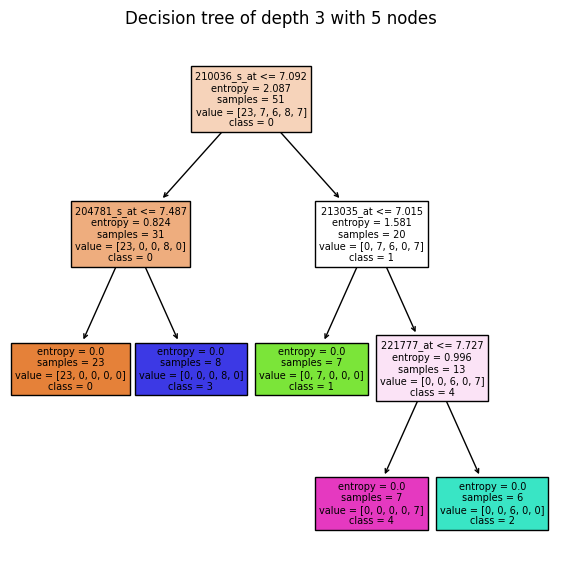

---------------------------------------------------------------------------------
Parameters of model DecisionTreeClassifier
ccp_alpha 0.0
class_weight None
criterion entropy
max_depth 4
max_features None
max_leaf_nodes None
min_impurity_decrease 0.0
min_samples_leaf 1
min_samples_split 2
min_weight_fraction_leaf 0.0
random_state 2
splitter best
---------------------------------------------------------------------------------


In [48]:
plt.figure()
plot_decision_tree(estimator_n_2.best_estimator_, list(x.columns))
plt.show()

# Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
parametri = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth':    [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}
estimator2 = GridSearchCV(RandomForestClassifier(), parametri, cv = 5)

In [65]:
estimator2.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 400]})

In [66]:
print(estimator2.best_score_)
print(estimator2.best_params_)

1.0
{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}


In [67]:
report(estimator2.best_estimator_, x_train, y_train,text = "train")
report(estimator2.best_estimator_, x_test, y_test,text = "test")

Classification report for model RandomForestClassifier on train data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         7

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51

---------------------------------------------------------------------------------
Confusion matrix for model RandomForestClassifier on train data 
---------------------------------------------------------------------------------
    0  1  2  3  4
0  23  0  0  0  0
1   0  7  0  0  0
2   0  0  6  0  0
3   0  0  0  8  0
4   0  0  0  0  7
-----------------------

Uspeli smo da dobijemo tacnost 100% sto je jako cudno :) </br>
To moze biti zbog toga sto dataset ima samo 64 instance, pa je igrom slucaja algoritmom slucajnih stabala uspeo da ubode sve test instance. Ova tacnost sigurno ne bi bila ovakva u opstem slucaju :).
Probacemo da splitujemo podatke sa drugim random state parametrom.

In [54]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size = 0.4, random_state = 41)

In [55]:
parametri = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth':    [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}
estimator3 = GridSearchCV(RandomForestClassifier(), parametri, cv = 5)
estimator3.fit(x_train2, y_train2)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 400]})

In [57]:
print(estimator3.best_score_)
print(estimator3.best_params_)

0.975
{'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 100}


In [62]:
report(estimator3.best_estimator_, x_train2, y_train2,text = "train")
report(estimator3.best_estimator_, x_test2, y_test2,text = "test")

Classification report for model RandomForestClassifier on train data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

---------------------------------------------------------------------------------
Confusion matrix for model RandomForestClassifier on train data 
---------------------------------------------------------------------------------
    0  1  2  3  4
0  17  0  0  0  0
1   0  5  0  0  0
2   0  0  6  0  0
3   0  0  0  5  0
4   0  0  0  0  5
-----------------------

<Axes: >

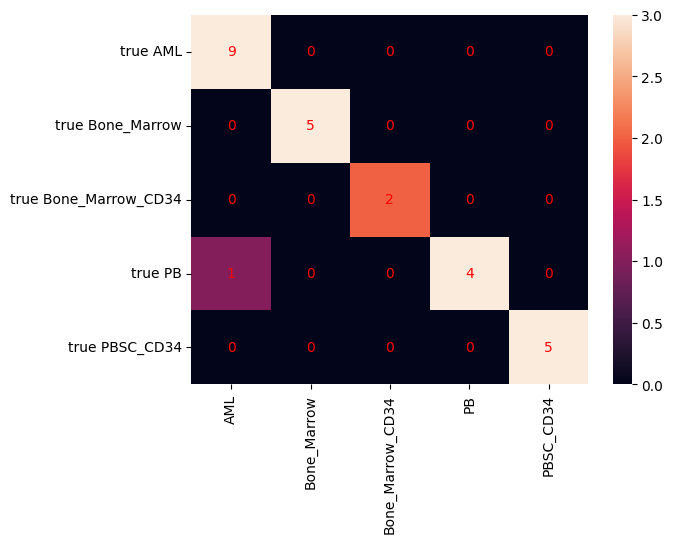

In [71]:
sb.heatmap(matConf(estimator3, x_test2, y_test2), xticklabels = ["AML", "Bone_Marrow", "Bone_Marrow_CD34", "PB", "PBSC_CD34"], yticklabels = ["true AML", "true Bone_Marrow", "true Bone_Marrow_CD34", "true PB", "true PBSC_CD34"], annot = True, annot_kws = akws, fmt = 'g', vmin = 0, vmax = 3)

## Poredjenje modela

Poredjenje cemo raditi ROC krivom, ali moracemo da napravimo izmene standardnoj metodi jer se ona inace koristi za binarnu klasifikaciju.

Koristicemo OvR (One vs Rest - Jedan naspram Ostalih) metodu za evaluaciju modela. Tj. mericemo razdvojenost svake klase zasebno od svih ostalih klasa.

In [72]:
classes = tree_n_2.classes_
classes

array([0, 1, 2, 3, 4])

In [73]:
def calculate_tpr_fpr(y_real, y_pred):
    cm = confusion_matrix(y_real, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]

    tpr =  TP/(TP + FN)
    fpr = 1 - TN/(TN+FP)
    
    return tpr, fpr

def get_all_roc_coordinates(y_real, y_proba):
    tpr_list = [0]
    fpr_list = [0]
    for i in range(len(y_proba)):
        threshold = y_proba[i]
        y_pred = y_proba >= threshold
        tpr, fpr = calculate_tpr_fpr(y_real, y_pred)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    return tpr_list, fpr_list

def plot_roc_curve(tpr, fpr, scatter = True, ax = None):
    if ax == None:
        plt.figure(figsize = (5, 5))
        ax = plt.axes()
    
    if scatter:
        sb.scatterplot(x = fpr, y = tpr, ax = ax)
    sb.lineplot(x = fpr, y = tpr, ax = ax)
    sb.lineplot(x = [0, 1], y = [0, 1], color = 'green', ax = ax)
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

tacnost: 0.7692
Histogrami i ROC krive:


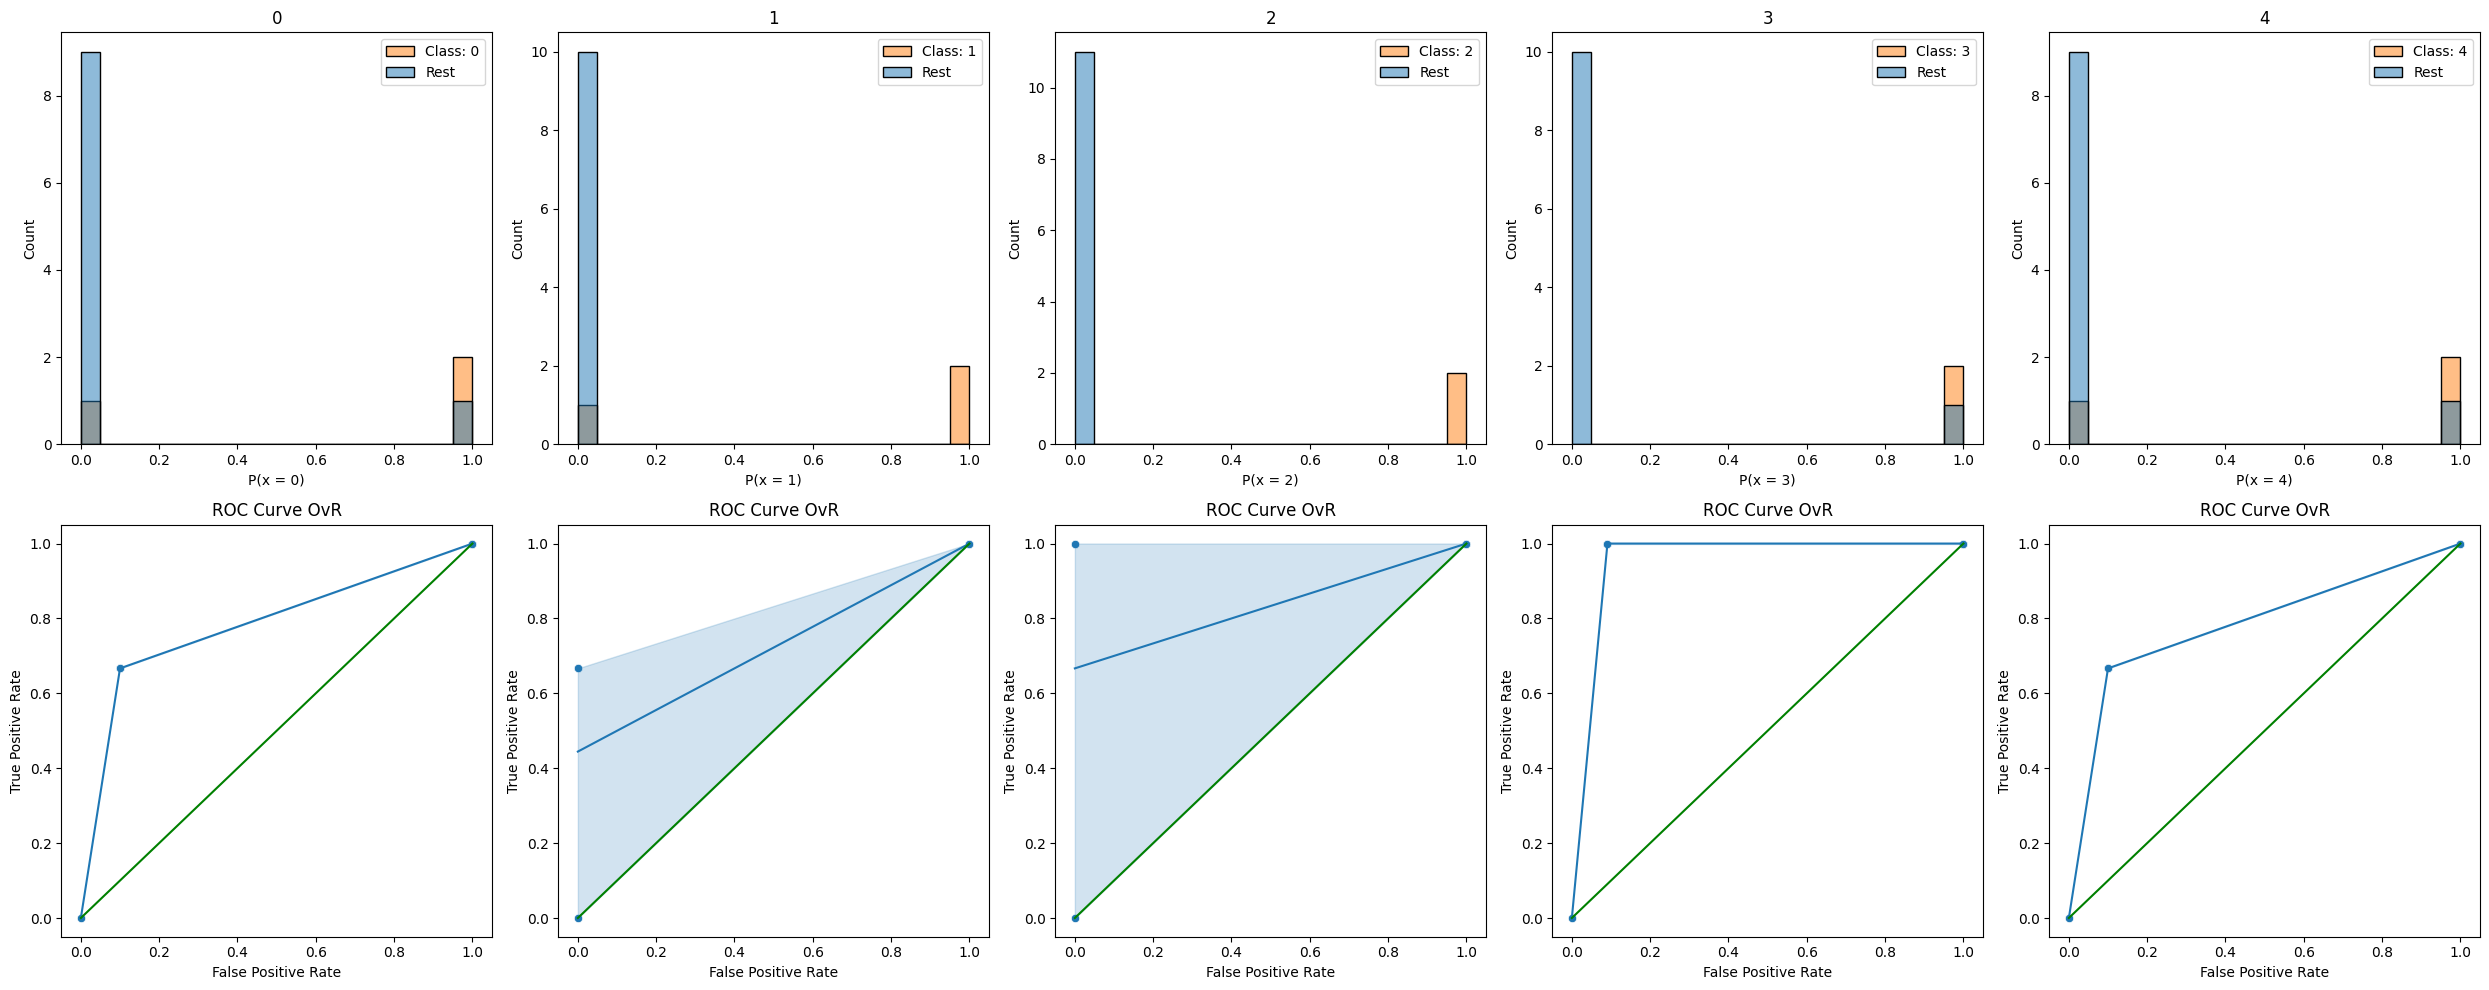

In [60]:
plt.figure(figsize = (25, 10))
bins = [i/20 for i in range(20)] + [1]
roc_auc_ovr = {}
    
y_pred = tree1.predict(x_test)
y_proba = tree1.predict_proba(x_test)
print("tacnost: %.4f" % accuracy_score(y_test, y_pred))
print("Histogrami i ROC krive:")

for i in range(len(classes)):
    c = classes[i]

    df_aux = x_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test]
    df_aux['prob'] = y_proba[:, i]
    df_aux = df_aux.reset_index(drop = True)

    ax = plt.subplot(2, 5, i+1)
    sb.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")

    ax_bottom = plt.subplot(2, 5, i+6)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = True, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")

    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
plt.tight_layout()

tacnost: 0.8462
Histogrami i ROC krive:


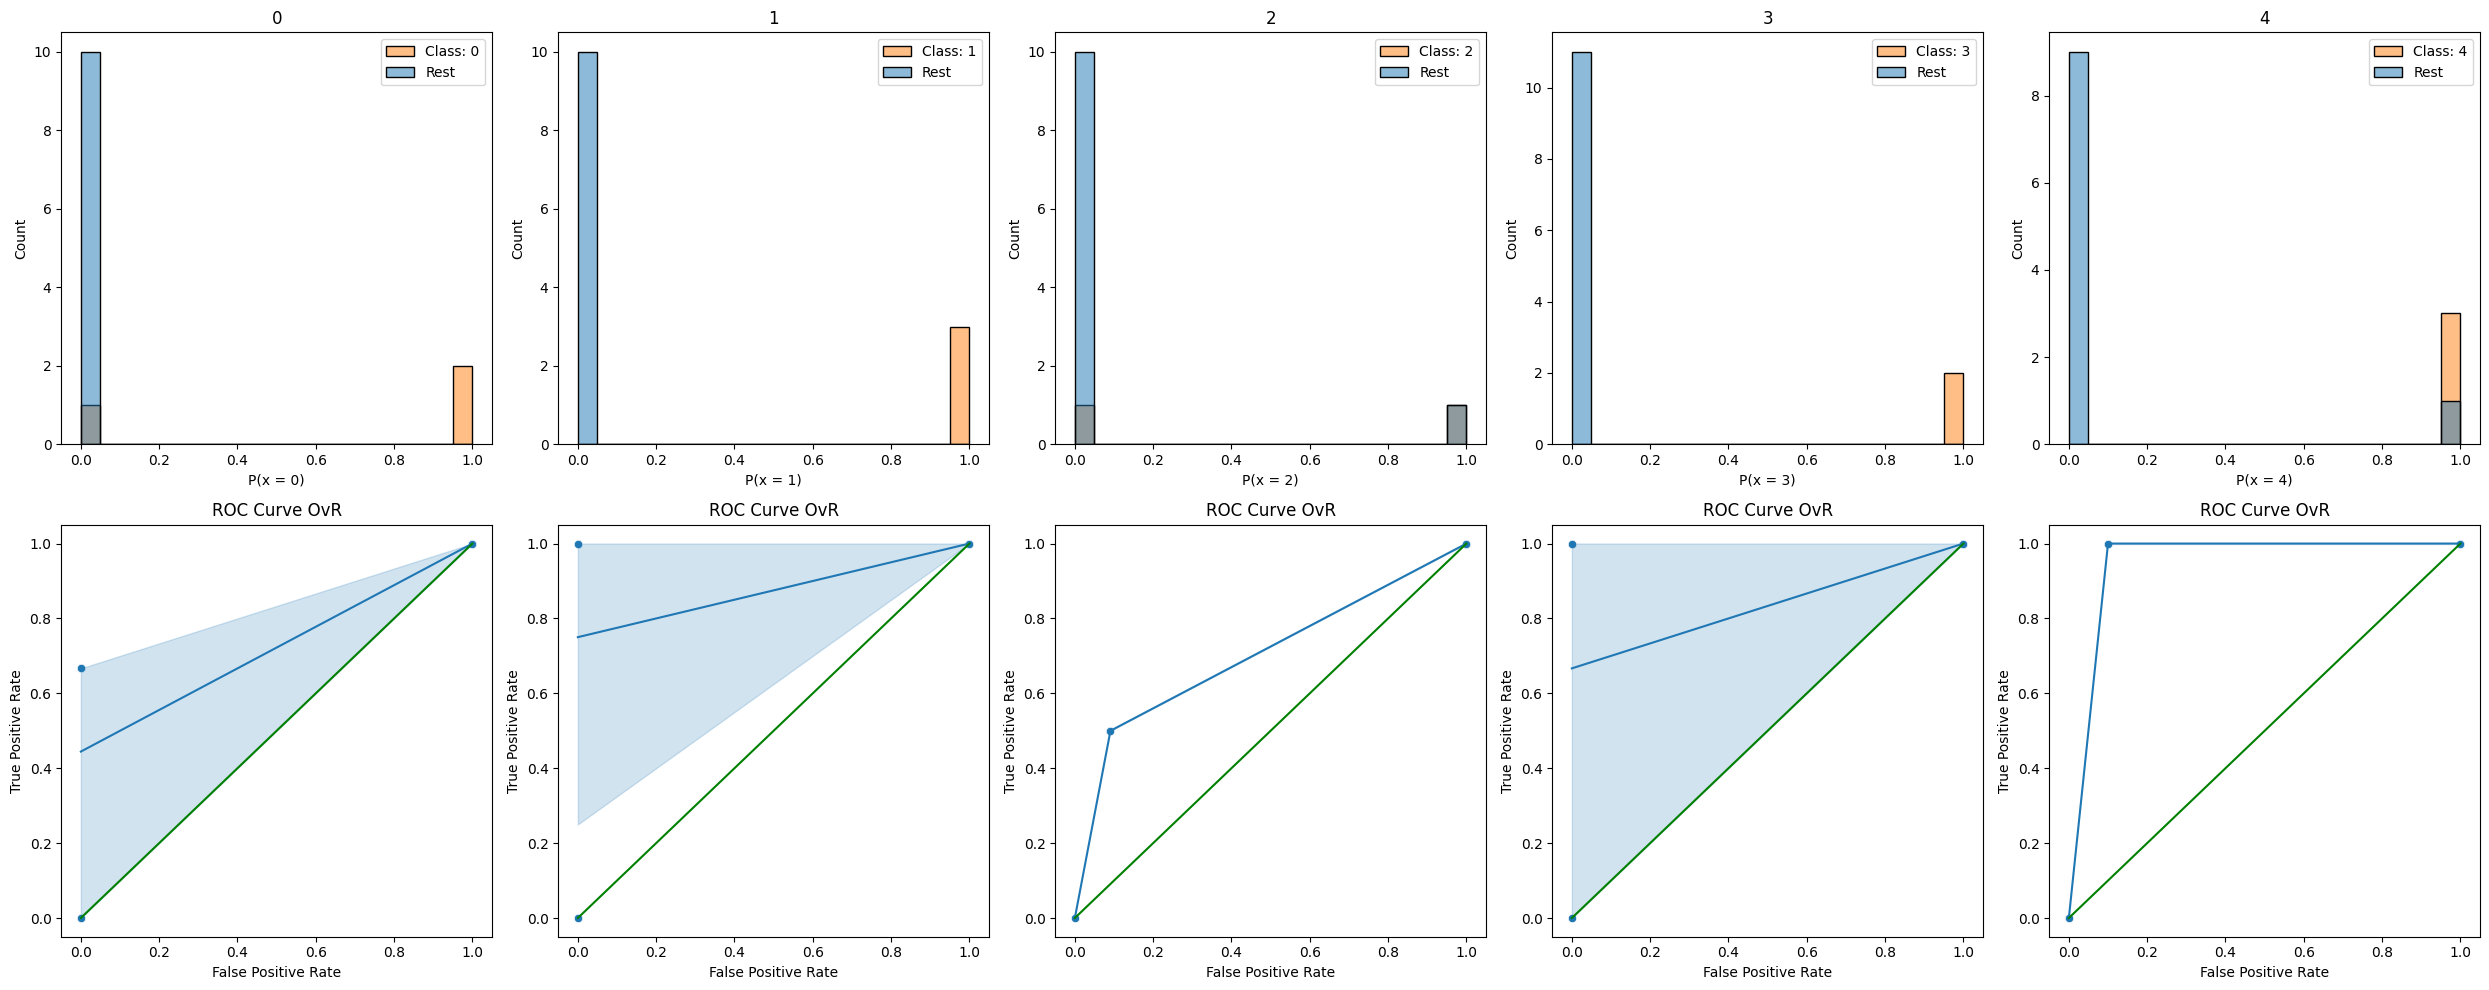

In [61]:
plt.figure(figsize = (25, 10))
bins = [i/20 for i in range(20)] + [1]
roc_auc_ovr = {}
    
y_pred = estimator.best_estimator_.predict(x_test)
y_proba = estimator.best_estimator_.predict_proba(x_test)
print("tacnost: %.4f" % accuracy_score(y_test, y_pred))
print("Histogrami i ROC krive:")

for i in range(len(classes)):
    c = classes[i]

    df_aux = x_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test]
    df_aux['prob'] = y_proba[:, i]
    df_aux = df_aux.reset_index(drop = True)

    ax = plt.subplot(2, 5, i+1)
    sb.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")

    ax_bottom = plt.subplot(2, 5, i+6)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = True, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")

    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
plt.tight_layout()

tacnost: 0.6923
Histogrami i ROC krive:


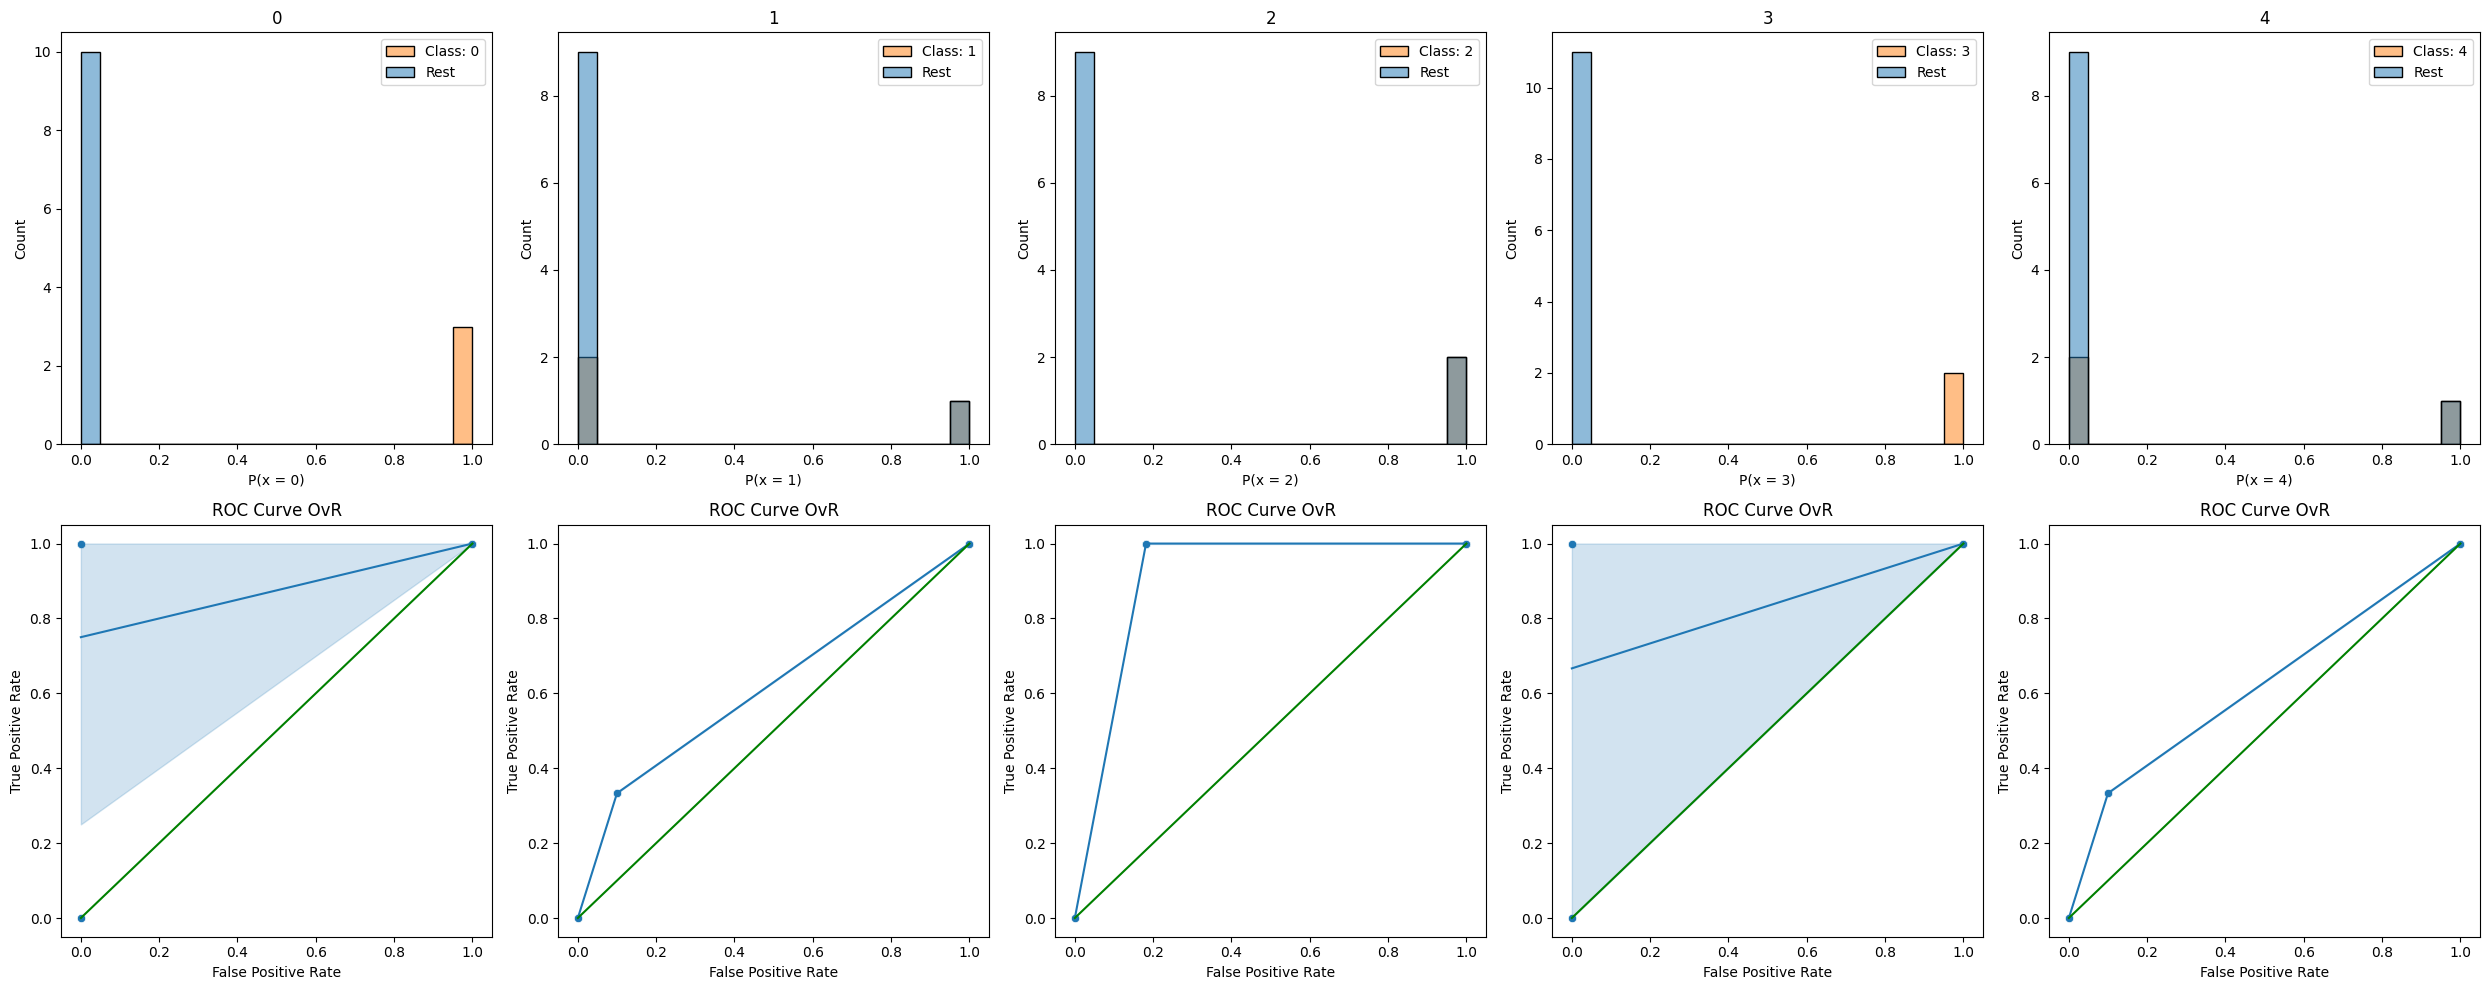

In [63]:
plt.figure(figsize = (25, 10))
bins = [i/20 for i in range(20)] + [1]
roc_auc_ovr = {}
    
y_pred = tree3.predict(x_test2)
y_proba = tree3.predict_proba(x_test2)
print("tacnost: %.4f" % accuracy_score(y_test, y_pred))
print("Histogrami i ROC krive:")

for i in range(len(classes)):
    c = classes[i]

    df_aux = x_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test]
    df_aux['prob'] = y_proba[:, i]
    df_aux = df_aux.reset_index(drop = True)

    ax = plt.subplot(2, 5, i+1)
    sb.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")

    ax_bottom = plt.subplot(2, 5, i+6)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = True, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")

    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
plt.tight_layout()

tacnost: 0.8462
Histogrami i ROC krive:


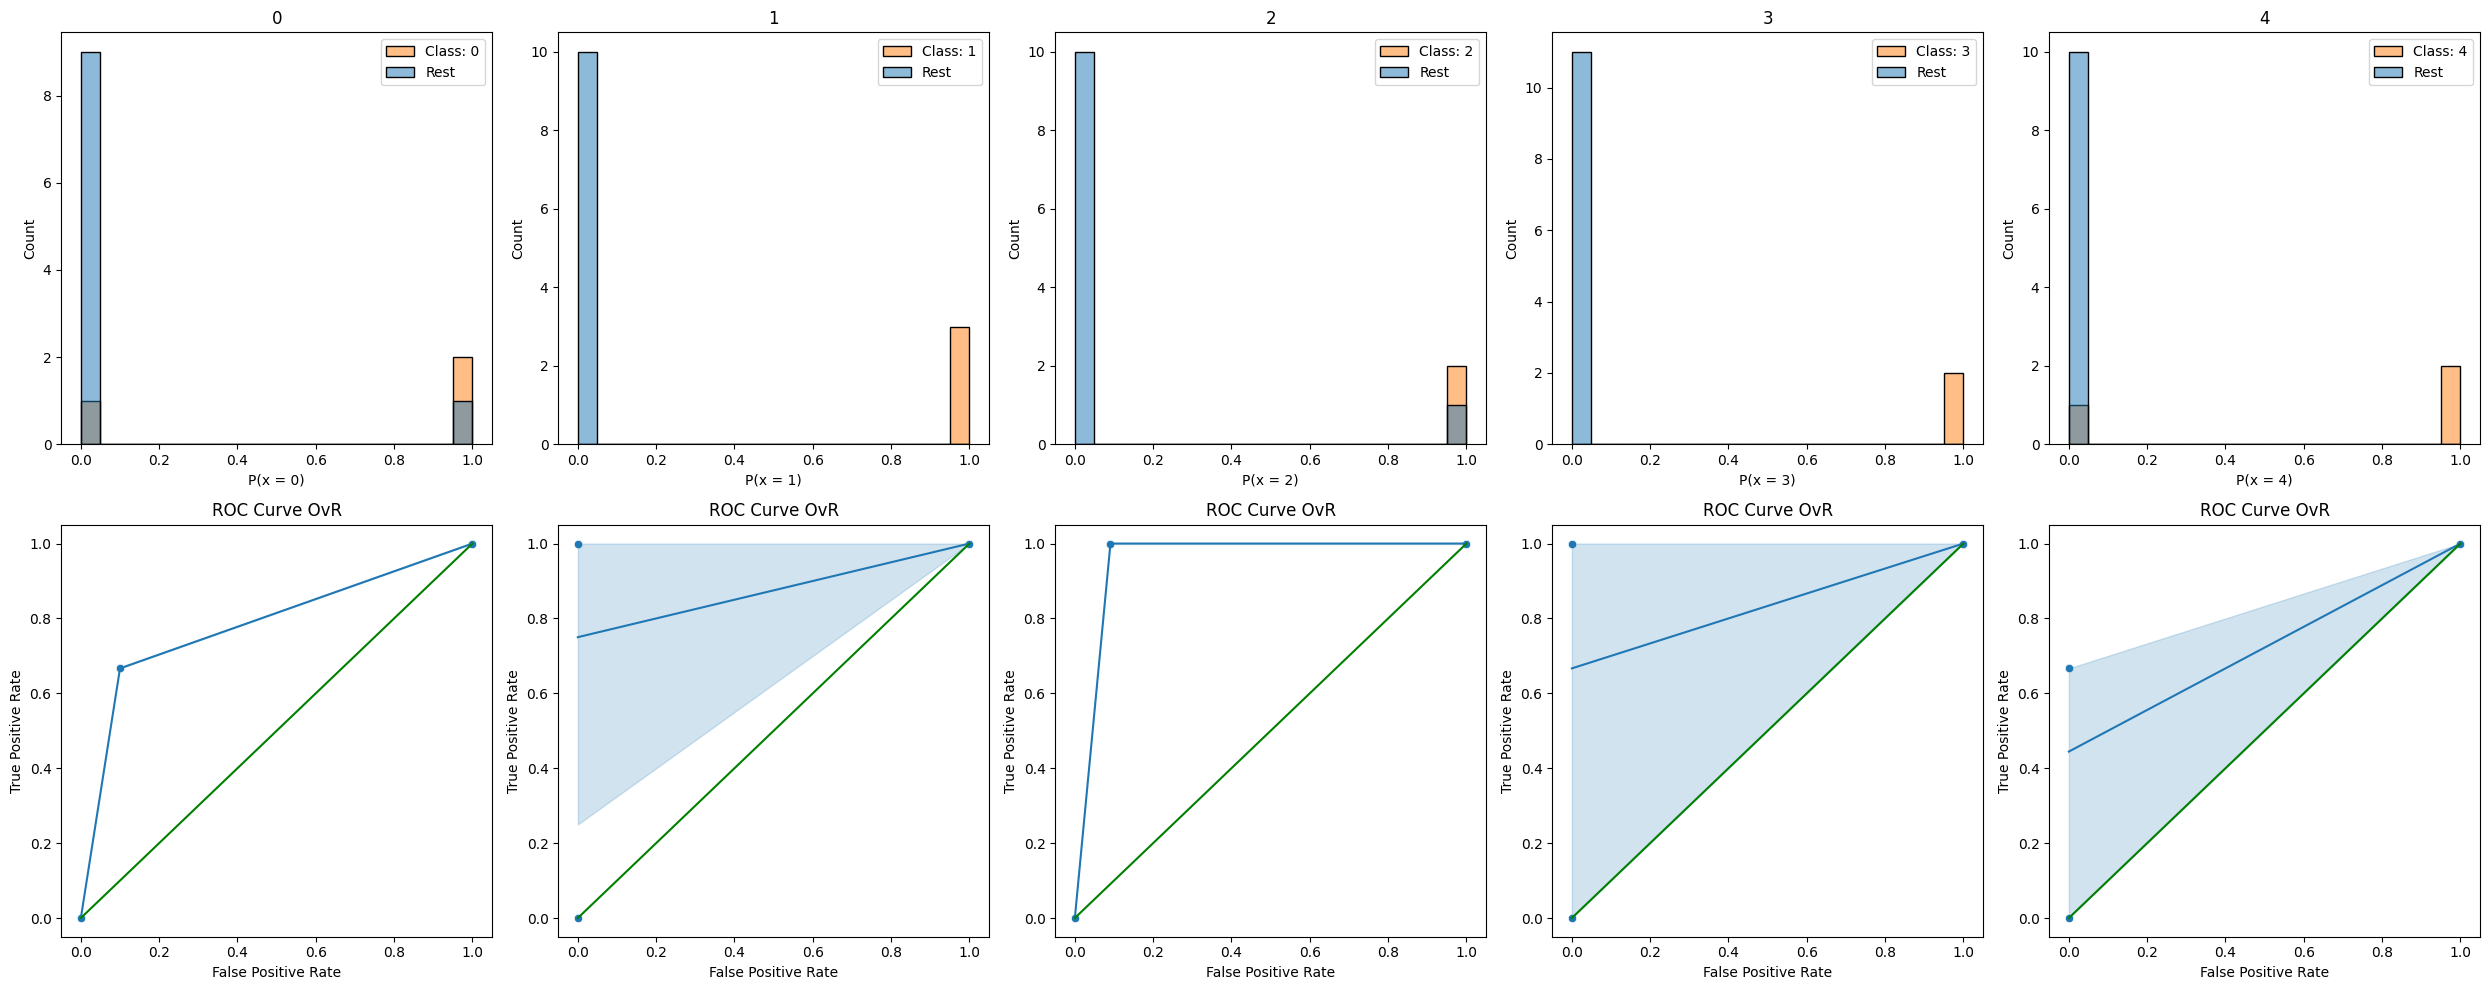

In [30]:
plt.figure(figsize = (25, 10))
bins = [i/20 for i in range(20)] + [1]
roc_auc_ovr = {}
    
y_pred = tree_n_2.predict(x_test)
y_proba = tree_n_2.predict_proba(x_test)
print("tacnost: %.4f" % accuracy_score(y_test, y_pred))
print("Histogrami i ROC krive:")

for i in range(len(classes)):
    c = classes[i]

    df_aux = x_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test]
    df_aux['prob'] = y_proba[:, i]
    df_aux = df_aux.reset_index(drop = True)

    ax = plt.subplot(2, 5, i+1)
    sb.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")

    ax_bottom = plt.subplot(2, 5, i+6)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = True, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")

    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
plt.tight_layout()

tacnost: 1.0000
Histogrami i ROC krive:


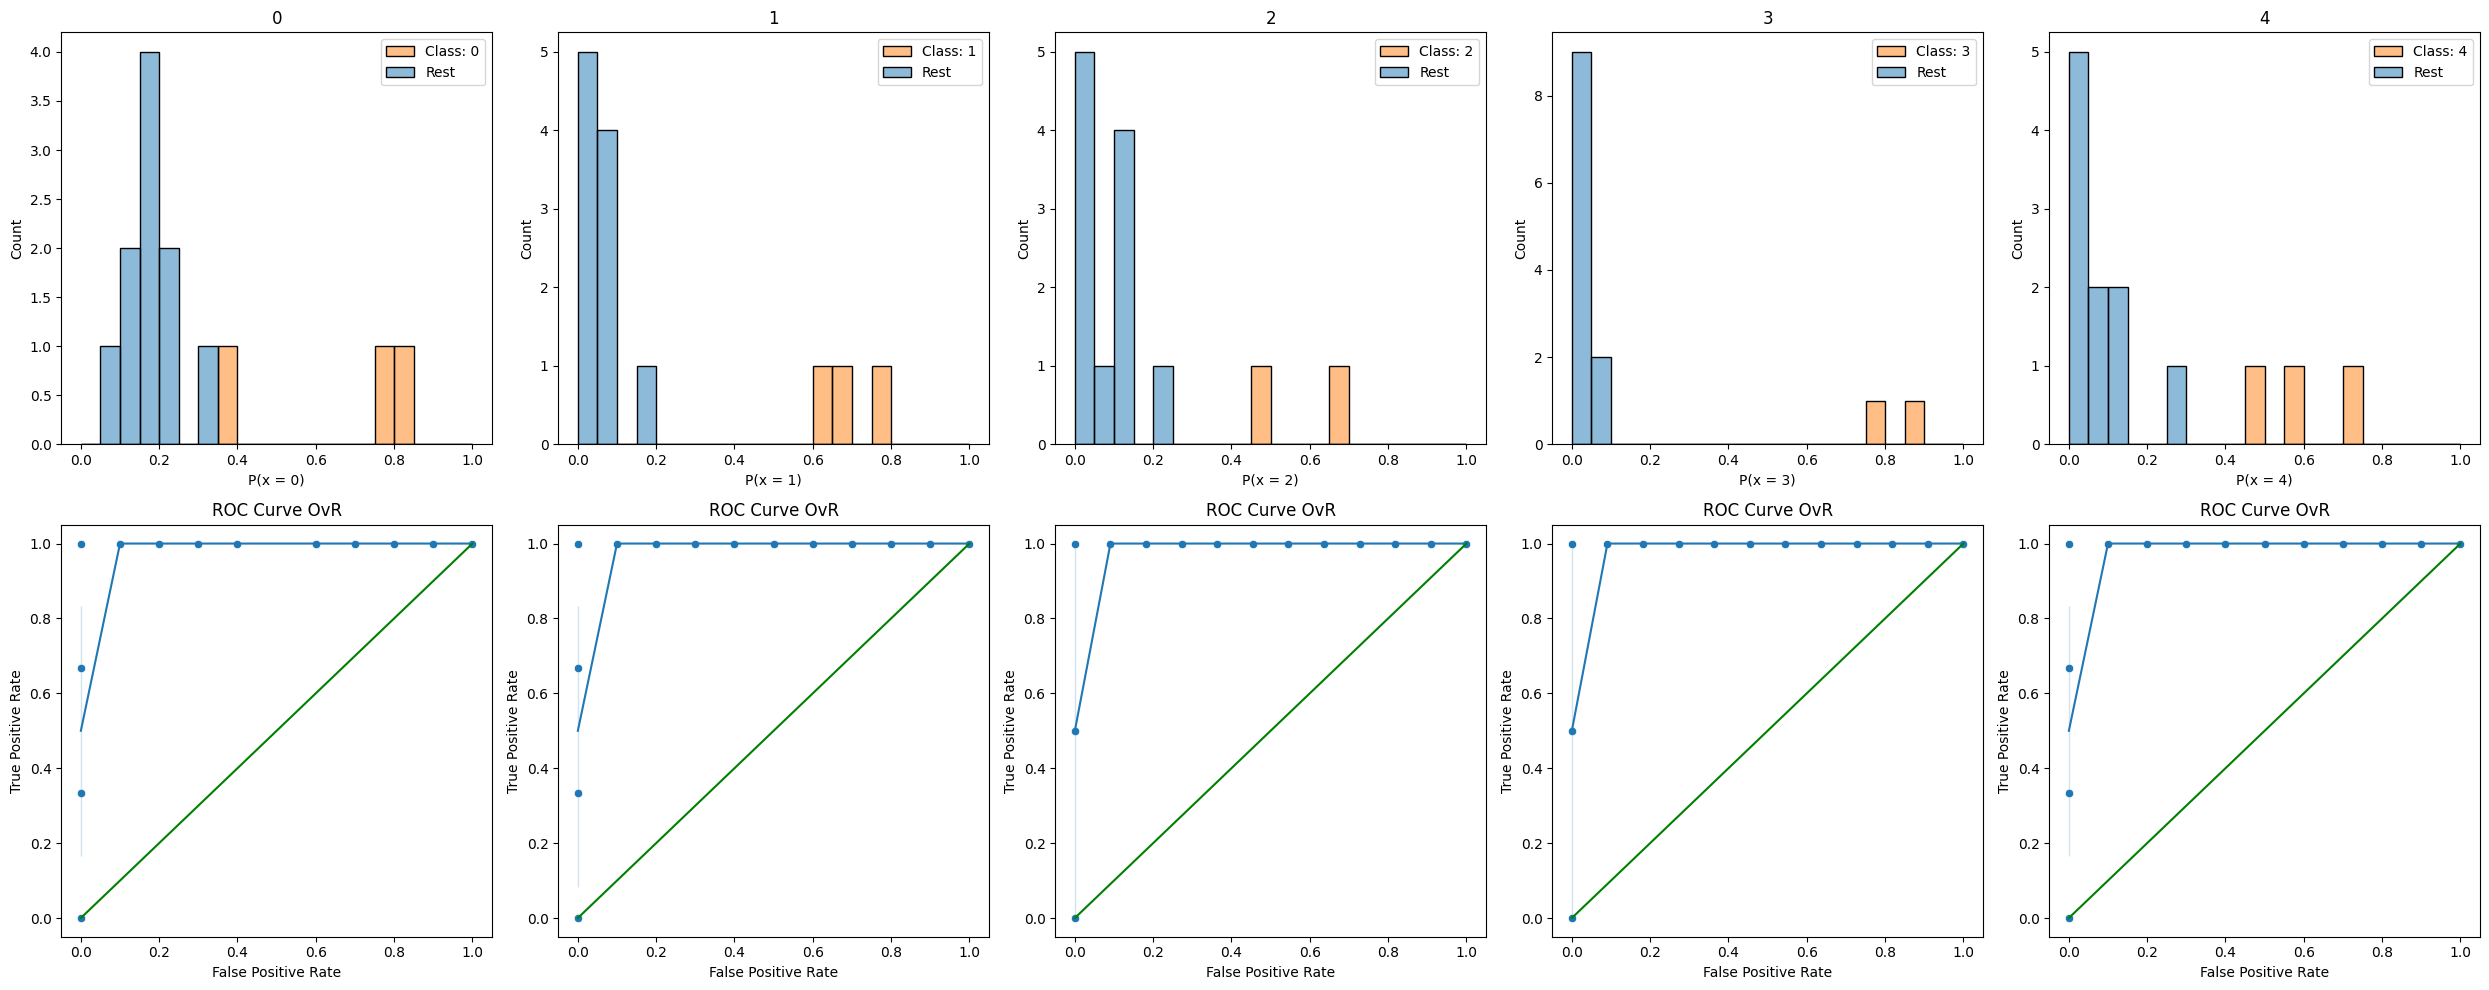

In [65]:
plt.figure(figsize = (25, 10))
bins = [i/20 for i in range(20)] + [1]
roc_auc_ovr = {}
    
y_pred = estimator2.best_estimator_.predict(x_test)
y_proba = estimator2.best_estimator_.predict_proba(x_test)
print("tacnost: %.4f" % accuracy_score(y_test, y_pred))
print("Histogrami i ROC krive:")

for i in range(len(classes)):
    c = classes[i]

    df_aux = x_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test]
    df_aux['prob'] = y_proba[:, i]
    df_aux = df_aux.reset_index(drop = True)

    ax = plt.subplot(2, 5, i+1)
    sb.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")

    ax_bottom = plt.subplot(2, 5, i+6)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = True, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")

    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
plt.tight_layout()

tacnost: 0.9615
Histogrami i ROC krive:


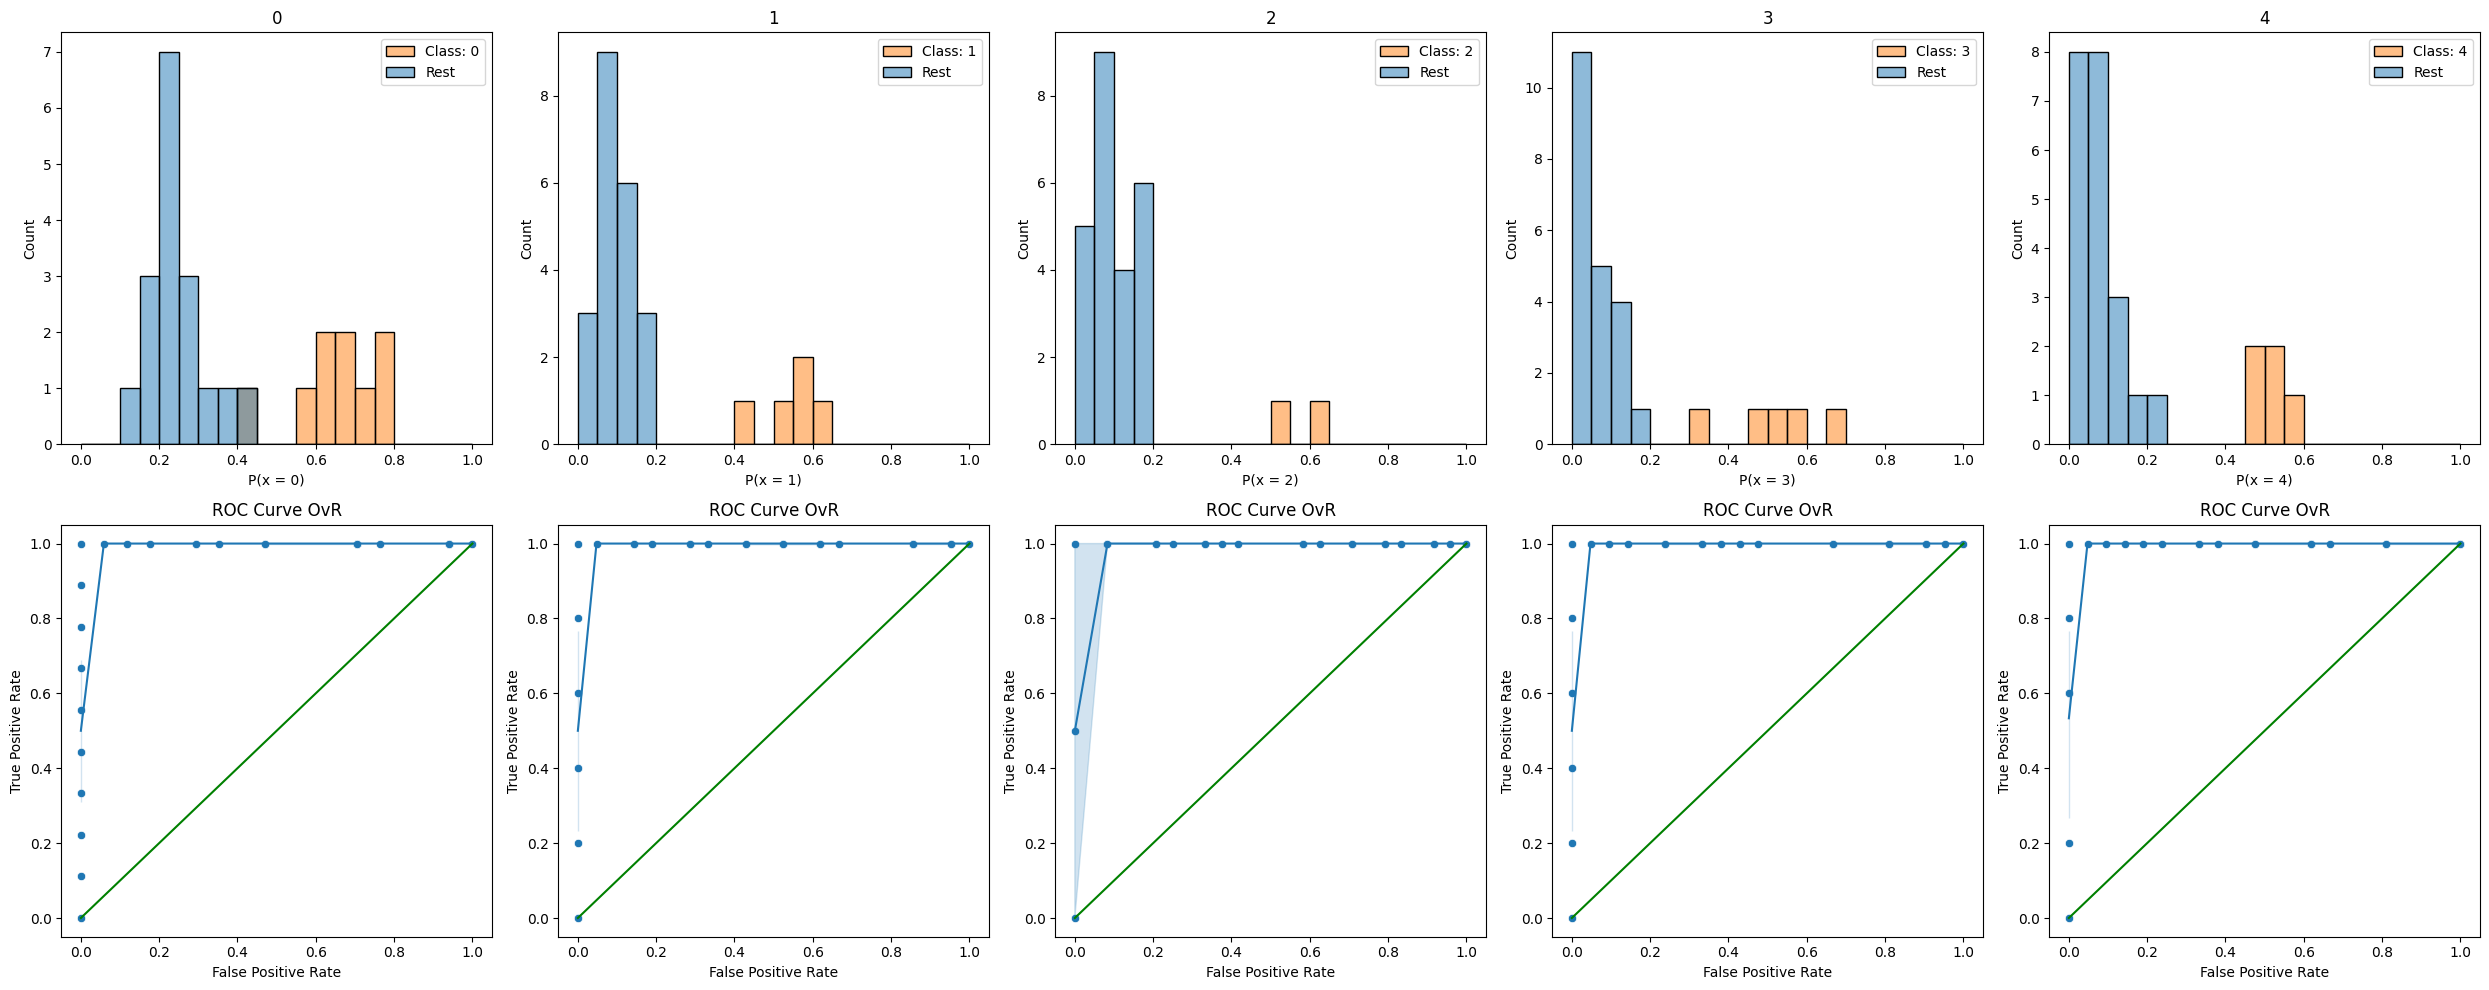

In [74]:
plt.figure(figsize = (25, 10))
bins = [i/20 for i in range(20)] + [1]
roc_auc_ovr = {}
    
y_pred = estimator3.best_estimator_.predict(x_test2)
y_proba = estimator3.best_estimator_.predict_proba(x_test2)
print("tacnost: %.4f" % accuracy_score(y_test2, y_pred))
print("Histogrami i ROC krive:")

for i in range(len(classes)):
    c = classes[i]

    df_aux = x_test2.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test2]
    df_aux['prob'] = y_proba[:, i]
    df_aux = df_aux.reset_index(drop = True)

    ax = plt.subplot(2, 5, i+1)
    sb.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")

    ax_bottom = plt.subplot(2, 5, i+6)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = True, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")

    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
plt.tight_layout()